<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/master/LSTM_B_T_Median_optimized-model_NON-overlapping%20AS%20events-EtOH_T_top-dpsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading essentials
import numpy as np
from numpy import loadtxt
from numpy import reshape
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)

In [0]:
# Load data
dataset = loadtxt('B-T-EtOH_non-overlapping_median_sort T top dpsi.csv', delimiter = ',')

In [0]:
# Reshape 2D dataset into a 3D dataset with columns as features with one time-step
x = dataset.reshape(32, 1, 30)

In [5]:
#Specify binary output of good (1) and bad (0) learners, y, in x. Learner type differentiated by population median.
y = x [:, :, -1]
print(y)

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [0]:
# Define LSTM (One to One Model) with Sigmoid activation on the output layer for binary classification. Add Dropout to input layer to prevent overfitting between epochs 1-50 without dropout.
model = Sequential()
model.add(LSTM(3, input_shape=(1,30)))
model.add(Dense(1, activation='sigmoid'))

In [0]:
#Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
#Fit the model with a 80-20 split of dataset & shuffling sample order within an epoch
history = model.fit(x, y, validation_split = 0.2, batch_size = 8, epochs = 1000, shuffle = True)

Train on 25 samples, validate on 7 samples
Epoch 1/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.6978 - accuracy: 0.6400 - val_loss: 0.7636 - val_accuracy: 0.2857
Epoch 2/1000
25/25 [==============================] - 0s 572us/step - loss: 0.6958 - accuracy: 0.6400 - val_loss: 0.7568 - val_accuracy: 0.2857
Epoch 3/1000
25/25 [==============================] - 0s 862us/step - loss: 0.6929 - accuracy: 0.6400 - val_loss: 0.7537 - val_accuracy: 0.2857
Epoch 4/1000
25/25 [==============================] - 0s 711us/step - loss: 0.6912 - accuracy: 0.6400 - val_loss: 0.7492 - val_accuracy: 0.2857
Epoch 5/1000
25/25 [==============================] - 0s 599us/step - loss: 0.6897 - accuracy: 0.6400 - val_loss: 0.7461 - val_accuracy: 0.2857
Epoch 6/1000
25/25 [==============================] - 0s 634us/step - loss: 0.6880 - accuracy: 0.6400 - val_loss: 0.7420 - val_accuracy: 0.2857
Epoch 7/1000
25/25 [==============================] - 0s 570us/step - loss: 0.6861 - accuracy:

In [9]:
#Model Summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3)                 408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________
None


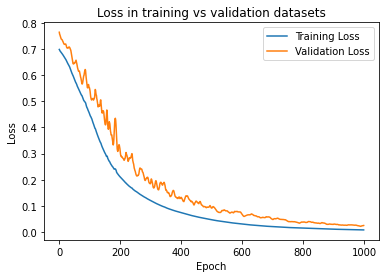

In [10]:
#Diagnostic plot Ia: Model Performance (training loss vs test loss) for 1000 epochs
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()

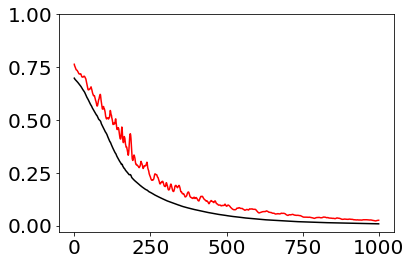

In [19]:
#Diagnostic plot Ia: Model Performance (training loss vs test loss) for 1000 epochs
pyplot.rcParams.update({'font.size': 20})
pyplot.plot(history.history['loss'], color = 'black')
pyplot.plot(history.history['val_loss'], color = 'red')
pyplot.yticks(np.arange(min(y), max(y)+0.1, 0.1))
pyplot.yticks(fontname = "Arial")
pyplot.xticks(fontname = "Arial")
ax=pyplot.gca()
ax.yaxis.set_major_locator(pyplot.MaxNLocator(5))
pyplot.savefig ('EtOH_T_top_dpsi.png', format = 'png', dpi = 600)
pyplot.show()

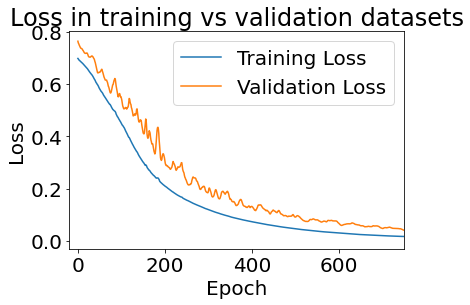

In [12]:
#Diagnostic plot Ib: Model Performance (training loss vs test loss) for 750 epochs
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.xlim(-20, 750)
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()

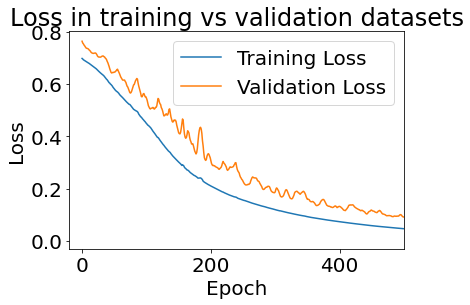

In [13]:
#Diagnostic plot Ic: Model Performance (training loss vs test loss) for 500 epochs
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.xlim(-20, 500)
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()

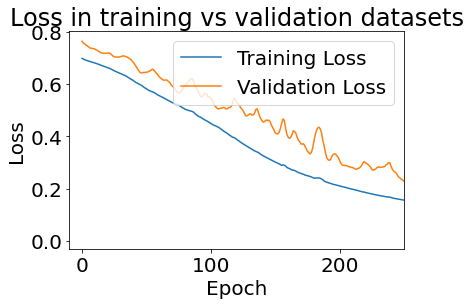

In [14]:
#Diagnostic plot Id: Model Performance (training loss vs test loss) for 250 epochs
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.xlim(-10, 250)
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()

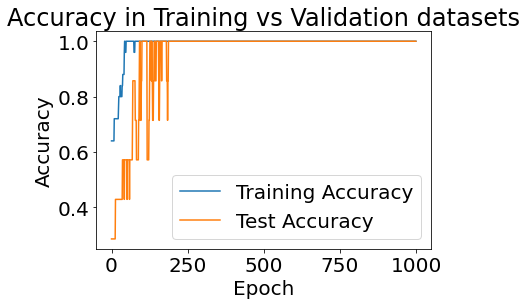

In [15]:
#Diagnostic Plot IIa: Model Performance (training accuracy vs test accuracy) for 1000 epochs
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()

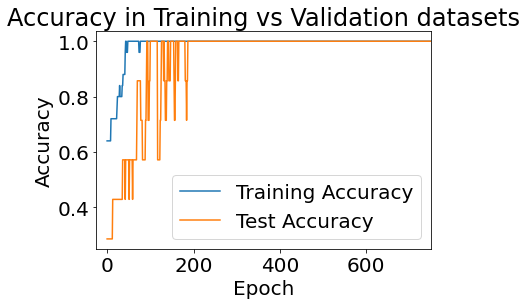

In [16]:
#Diagnostic Plot IIb: Model Performance (training accuracy vs test accuracy) for 750 epochs
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.xlim(-25, 750)
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()

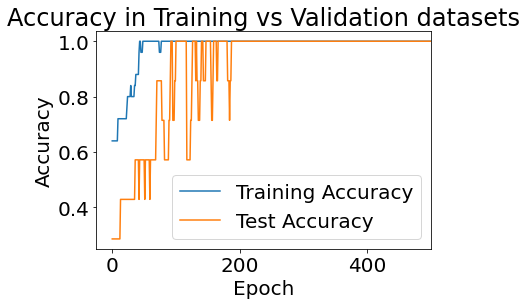

In [17]:
#Diagnostic Plot IIc: Model Performance (training accuracy vs test accuracy) for 500 epochs
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.xlim(-25, 500)
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()

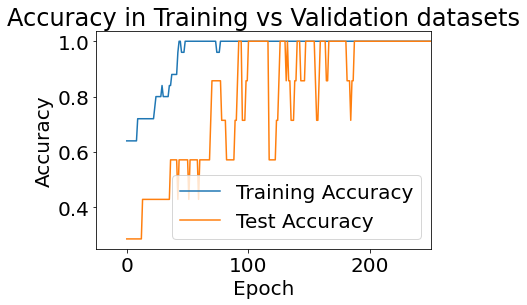

In [18]:
#Diagnostic Plot IIc: Model Performance (training accuracy vs test accuracy) for 250 epochs
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.xlim(-25, 250)
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()